<a href="https://colab.research.google.com/github/yohanesnuwara/starting-computer-vision/blob/main/Lesson_02_Neural_Networks_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Neural Network
<!--
![neural net note](https://user-images.githubusercontent.com/51282928/173242035-456b93f6-98f4-42e5-9204-e5dfd1c8a92f.png)
-->

In [ ]:
import matplotlib.pyplot as plt

# tensorflow
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# pytorch
import torch
from torch import nn
from torchvision import transforms, datasets
from torch import optim

Tensorflow --> neural network 

1. regression
predict monthly spending based on your daily menu, clothes, rents, ... (regression) --> y = f(x)
f --> machine learning models (Support Vector Machine, Random Forest, Boosting), neural network (composed neurons, numbers arranged in some way can mimic neuron)
machine learning --> train data so that your model fits your data i.e. 100 iterations

y = Ax+B --> A, B is unknown --> adjust through those iterations A, B fits and known

2. classification
predict monthly spending based on your daily menu, clothes, rents, ... (regression) --> y = f(x)

Neural network is a model

1. Dense neural network (DNN) / artif. neural network (ANN) / fully connected neural network (FCNN) / feed forward neural network (FF) / deep neural network (DNN) --> for any job, including image but not so efficient! Because image needs to be flattened
2. Convolutional neural net (CNN) --> specifically for images

Principle: the more you learn, you know more about something

![sssss](https://i0.wp.com/vinodsblog.com/wp-content/uploads/2018/10/CNN-2.png)



In [ ]:
import matplotlib.pyplot as plt

# tensorflow
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Flatten, Dense

# Deep Neural Network to classify handwritten digits (flatten)

MNIST is a grayscale image. Grayscale image has only 1 channel.

## Tensorflow

X --> image
y --> label

In [ ]:
images = mnist.load_data()
train, test = images
X_train, y_train = train
X_test, y_test = test

In [ ]:
# load dataset; separate train and test
# train, test = mnist.load_data()
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


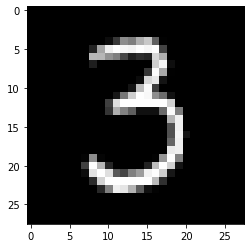

In [ ]:
# visualize first image
img = X_train[50]
plt.imshow(img, cmap='gray')

In [ ]:
for i in range(9):
  print(i)

0
1
2
3
4
5
6
7
8


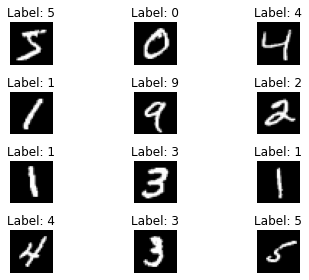

In [ ]:
# Visualize first 9 images
for i in range(12):
  plt.subplot(4,3,i+1)
  plt.imshow(X_train[i,...], cmap='gray')
  plt.title(f'Label: {y_train[i]}')
  plt.axis('off')

plt.tight_layout()


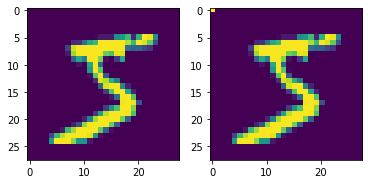

In [ ]:
image = X_train[0]
image_norm = image / 255.

plt.subplot(1,2,1)
plt.imshow(image)

plt.subplot(1,2,2)
plt.imshow(image_norm)

Neural network will learn better when image is normalize

In [ ]:
# Normalize divide by 255
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255


There are ways to increase accuracy
1. increase number of neurons
2. increase number of epochs (iterations)
3. 

In [ ]:
model = Sequential([Flatten(input_shape=(28, 28)),
                    Dense(128, activation='relu'),
                    Dense(60, activation='relu'),
                    Dense(10, activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 60)                7740      
                                                                 
 dense_2 (Dense)             (None, 10)                610       
                                                                 
Total params: 108,830
Trainable params: 108,830
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001), # SGD, RMSProp, AdaGrad
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()], 
)

In [ ]:
model.fit(X_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 3s 3ms/step - loss: 0.2772 - sparse_categorical_accuracy: 0.9193
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.1171 - sparse_categorical_accuracy: 0.9649
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0801 - sparse_categorical_accuracy: 0.9751
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0604 - sparse_categorical_accuracy: 0.9816
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0469 - sparse_categorical_accuracy: 0.9851


Overfitting, underfitting

2 ways to overcome overfitting:
1. Batch normalization layer
2. Droput layer

In [ ]:
# loss, acc = model.evaluate(X_test, y_test, batch_size=64)
# print("\nTest accuracy: %.1f%%" % (100.0 * acc))

In [ ]:
model

In [ ]:
import numpy as np

pred = model.predict(X_test)
y_pred = np.argmax(pred, axis=1) # classes

y_pred

array([7, 2, 1, ..., 4, 5, 6])

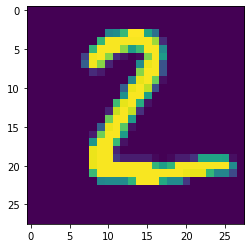

In [ ]:
plt.imshow(X_test[1])

accuracy = number of true predictions / total of number prediction

total prediction = 100

true prediction = 30

accuracy = 30%

In [ ]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
(y_pred==y_test).sum()

9727

In [ ]:
print(y_test)
print(y_pred)
print(len(y_test))
print((y_test == y_pred).sum().item())

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]
10000
9775


In [ ]:
### ARTICLE ON TENSORFLOW DATALOADER: https://www.tensorflow.org/datasets/keras_example

# (ds_train, ds_test), ds_info = tfds.load(
#     'mnist',
#     split=['train', 'test'],
#     shuffle_files=True,
#     as_supervised=True,
#     with_info=True,
# )

In [ ]:
# def normalize_img(image, label):
#   """Normalizes images: `uint8` -> `float32`."""
#   return tf.cast(image, tf.float32) / 255., label

# # Normalize train dataset
# ds_train = ds_train.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
# ds_train = ds_train.cache()
# ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
# ds_train = ds_train.batch(128)
# ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

# # Normalize test dataset
# ds_test = ds_test.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
# ds_test = ds_test.batch(128)
# ds_test = ds_test.cache()
# ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

In [ ]:
# model = Sequential([Flatten(input_shape=(28, 28)),
#                     Dense(128, activation='relu'),
#                     Dense(60, activation='relu'),
#                     Dense(10, activation='softmax')])
# model.summary()

In [ ]:
# model.compile(
#     optimizer=tf.keras.optimizers.Adam(0.001),
#     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#     metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
# )

In [ ]:
# model.fit(
#     ds_train,
#     epochs=6,
#     validation_data=ds_test,
# )

## PyTorch

https://analyticsindiamag.com/guide-to-feed-forward-network-using-pytorch-with-mnist-dataset/

In [ ]:
# class Network(nn.Module):
#     def __init__(self):
#         super().__init__()
        
#         # Inputs to hidden layer linear transformation
#         self.hidden = nn.Linear(784, 256)
#         # Output layer, 10 units - one for each digit
#         self.output = nn.Linear(256, 10)
        
#         # Define sigmoid activation and softmax output 
#         self.sigmoid = nn.Sigmoid()
#         self.softmax = nn.Softmax(dim=1)
        
#     def forward(self, x):
#         # Pass the input tensor through each of our operations
#         x = self.hidden(x)
#         x = self.sigmoid(x)
#         x = self.output(x)
#         x = self.softmax(x)
        
#         return x

# # Create the network and look at it's text representation
# model = Network()
# model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [ ]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [ ]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
testset = datasets.MNIST('~/.pytorch/MNIST_data/', train=False, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


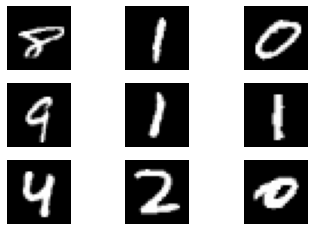

In [ ]:
examples = iter(trainloader)

# Unwrap to get image array and label
# Image array has shape (number of images,number of channel,image width, image height)
example_data, example_targets = examples.next()

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
    plt.axis('off')
plt.show()

In [ ]:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:


# model = nn.Sequential(nn.Linear(784, 128),
#                       nn.ReLU(),
#                       nn.Linear(128, 64),
#                       nn.ReLU(),
#                       nn.Linear(64, 10),
#                       nn.LogSoftmax(dim=1))

# Define the loss
criterion = nn.NLLLoss()

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.003)
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        # images = images.view(images.shape[0], -1)
        images = images.reshape(-1, 28*28)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.291103703079066
Training loss: 0.28308796533929514
Training loss: 0.2752769161214325
Training loss: 0.26767069577916597
Training loss: 0.2605150051351422


In [ ]:
examples = iter(testloader)

# Unwrap to get image array and label
# Image array has shape (number of images,number of channel,image width, image height)
example_data, example_targets = examples.next()

with torch.no_grad():
  X_test = example_data.reshape(-1, 28*28)
  y_pred = model(X_test)

  _, predicted = torch.max(y_pred.data, 1)
  print(example_targets)
  print(predicted)

  # Calculate accuracy
  print(len(example_targets))
  print((example_targets == predicted).sum().item())

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3])
tensor([7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 6, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 3, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 4, 2])
64
59
